<a href="https://colab.research.google.com/github/kvbicki/ml-pyton-course/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Data preparation. You should clean and organize the dataset. Consider the
following points:
• If you have categorical variables, consider using OrdinalEncoder or OneHotEncoder from
sklearn.preprocessing. Always carefully evaluate which approach is most appropriate for
your specific case.
• If some values in the dataset are missing, consider using the dropna() function from
Pandas.
• Evaluate which features are important and which might introduce ambiguity.
• Consider creating "new" features as combinations of existing ones. For example, you
could use the ratio of volatile acidity or citric acid to fixed acidity as a new feature. In
other cases, this might be GDP per capita or the price per square meter.
• You may need to handle outliers.
• Consider applying feature scaling.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/drive/MyDrive/Datasets/student_lifestyle_dataset.csv')
data = data.drop('Student_ID', axis=1)

mapping = {'Low' : 1, 'Moderate' : 2, 'High' : 3}
data['Stress_Level'] = data['Stress_Level'].map(mapping)
data["Study_Sleep_Ratio"] = data["Study_Hours_Per_Day"] / data["Sleep_Hours_Per_Day"]
data["Social_Study_Ratio"] = data["Social_Hours_Per_Day"] / data["Study_Hours_Per_Day"]

data_train, data_temp = train_test_split(data, test_size=0.4, random_state=1)
data_test, data_val = train_test_split(data_temp, test_size=0.5, random_state=1)


print(data_train.shape)
print(data_test.shape)
print(data_val.shape)

data.describe()

(1200, 9)
(400, 9)
(400, 9)


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Study_Sleep_Ratio,Social_Study_Ratio
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960,2.366000,1.036020,0.381766
std,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674,0.727536,0.285940,0.261056
min,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000,1.000000,0.505051,0.000000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000,2.000000,0.822884,0.160370
50%,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000,3.000000,1.000000,0.342661
75%,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000,3.000000,1.212500,0.573846
max,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000,3.000000,1.941176,1.200000


In [ ]:
data.isnull().sum()

,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


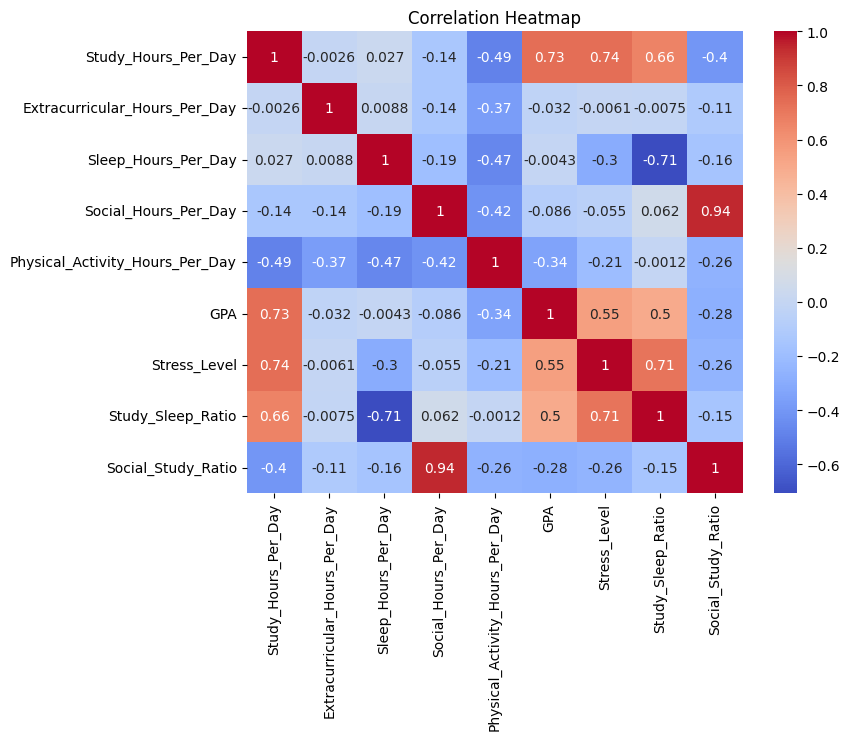

In [ ]:
cor = data.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




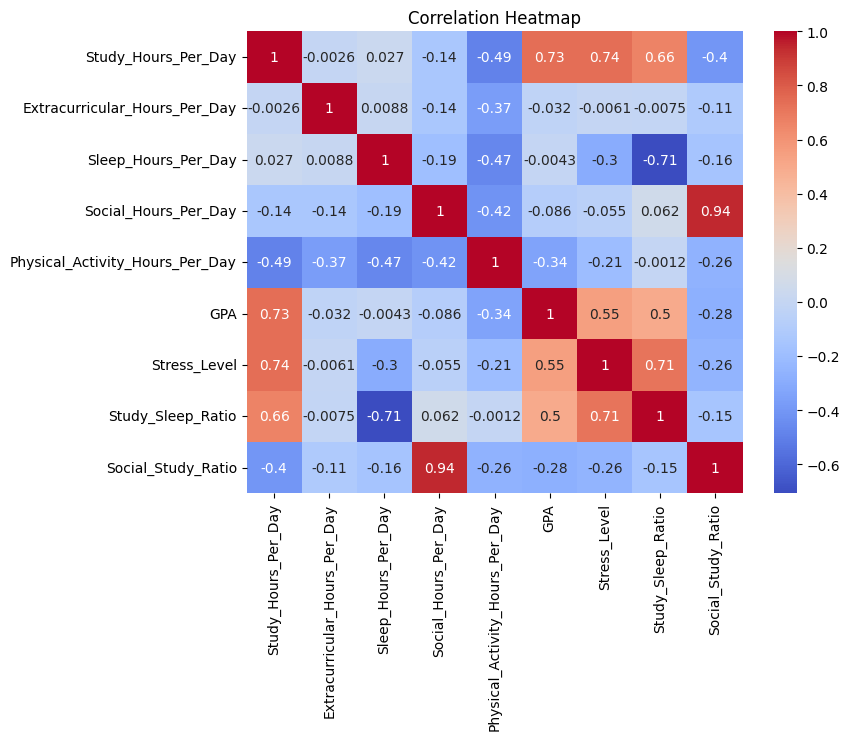

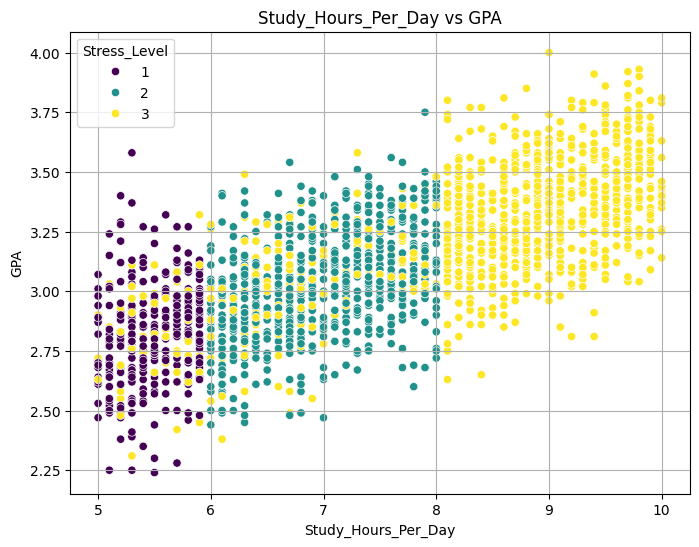

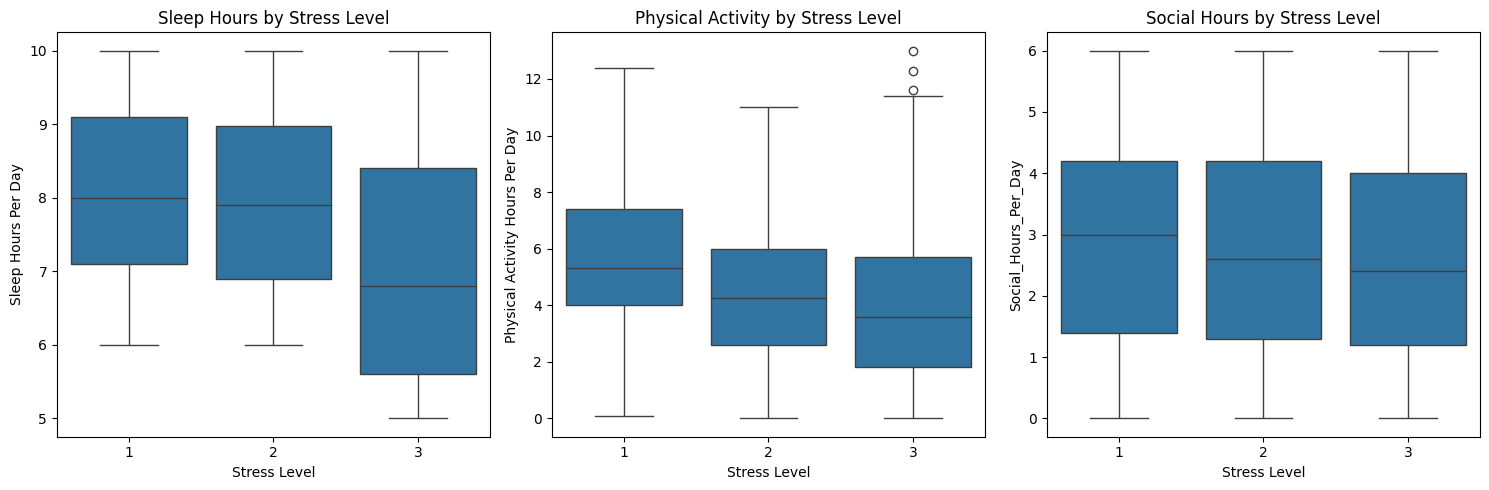

<Figure size 800x600 with 0 Axes>

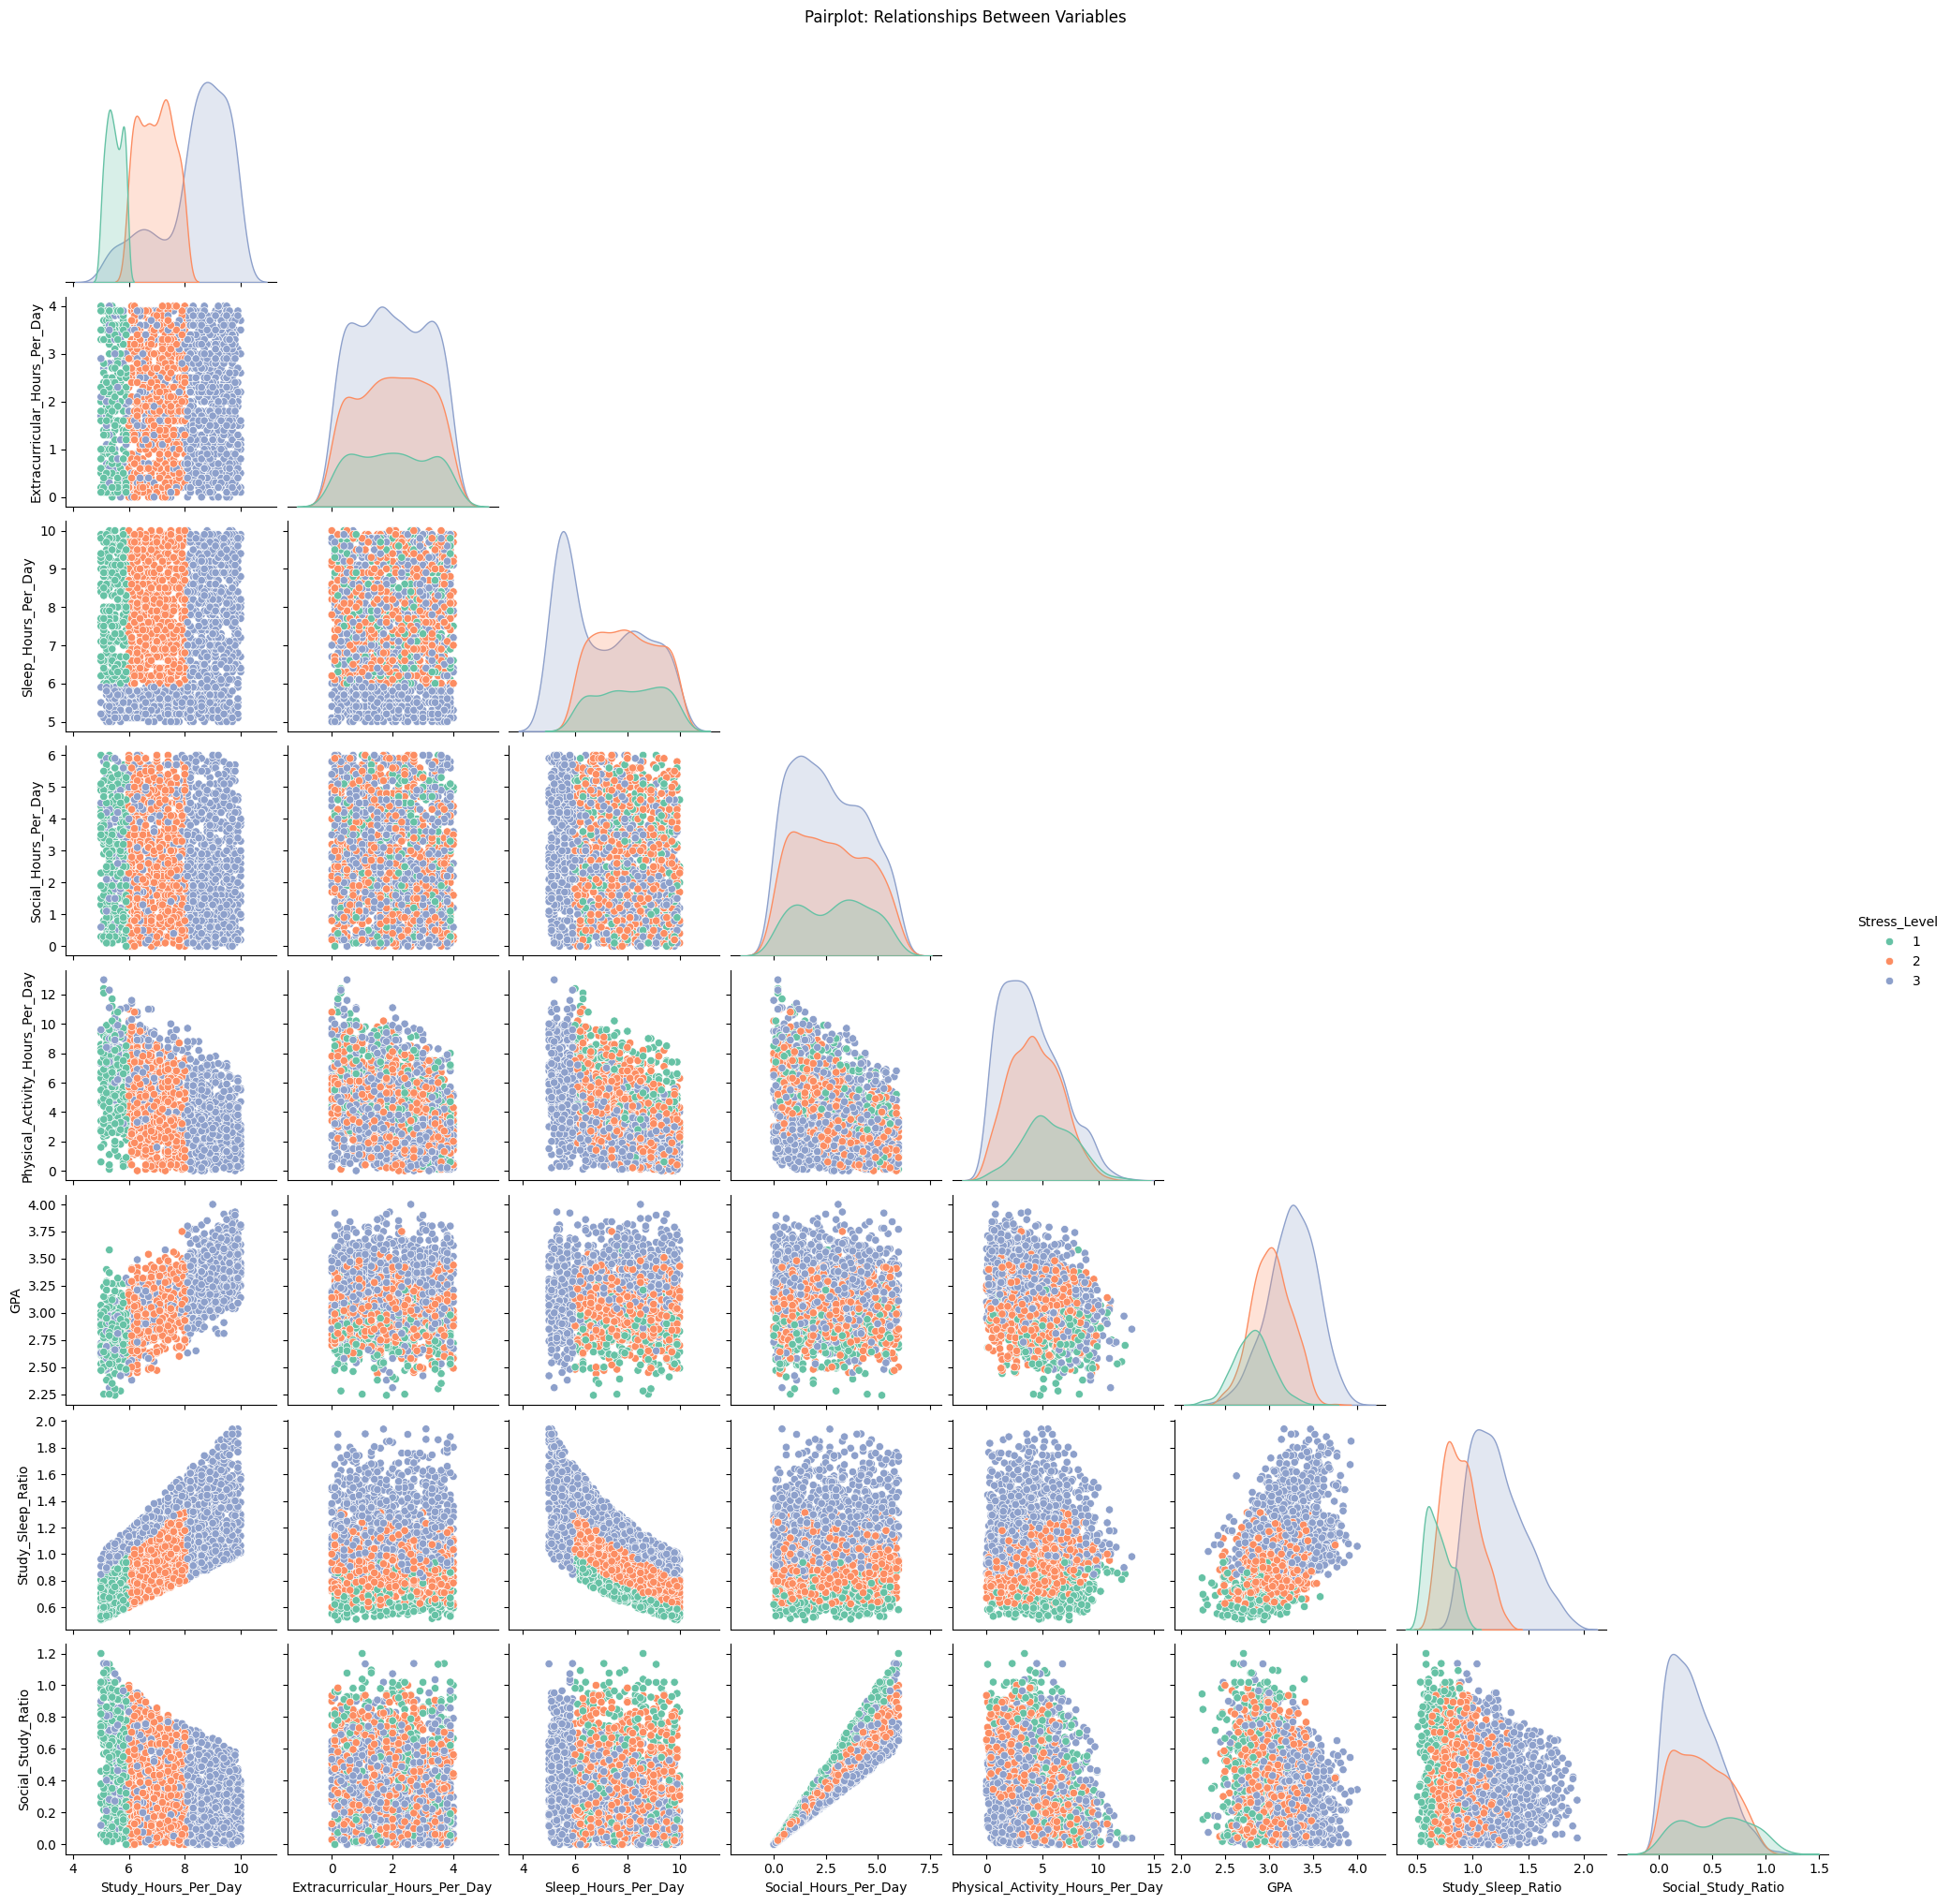

In [ ]:
cor = data.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Study_Hours_Per_Day', y='GPA', hue='Stress_Level', palette='viridis')
plt.title('Study_Hours_Per_Day vs GPA')
plt.xlabel('Study_Hours_Per_Day')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='Stress_Level', y='Sleep_Hours_Per_Day')
plt.title('Sleep Hours by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Hours Per Day')
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='Stress_Level', y='Physical_Activity_Hours_Per_Day')
plt.title('Physical Activity by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Physical Activity Hours Per Day')
plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='Stress_Level', y='Social_Hours_Per_Day')
plt.title('Social Hours by Stress Level')
plt.xlabel('Stress Level')

plt.tight_layout()
plt.show()
plt.figure(figsize=(8,6))
sns.pairplot(data, hue="Stress_Level", palette="Set2", corner=True)
plt.suptitle("Pairplot: Relationships Between Variables", y=1.02)
plt.show()





MLP Classifier

In [ ]:
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

all = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Study_Sleep_Ratio', 'Social_Study_Ratio', "GPA"]
without_sleep = ['Study_Hours_Per_Day',  'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Social_Study_Ratio', "GPA"]
features1 = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day']
features2 = ['Study_Sleep_Ratio', 'Social_Study_Ratio']
features3 = ['GPA', 'Study_Sleep_Ratio', 'Social_Study_Ratio']

features = [all,without_sleep, features1, features2, features3]

y_train = data_train['Stress_Level']
y_test = data_test['Stress_Level']
y_val = data_val['Stress_Level']
for feature in features:
  x_train = data_train[feature]
  x_test = data_test[feature]
  x_val = data_val[feature]

  clf_mlp = MLPClassifier(hidden_layer_sizes=(15, 5),
                          activation='relu',
                          solver='lbfgs',
                          max_iter=3000,
                          max_fun=25000,
                          random_state = 30
                          )


  clf_mlp.fit(x_train, y_train)


  y_pred_train = clf_mlp.predict(x_train)
  y_pred_val = clf_mlp.predict(x_val)

  acc_train = accuracy_score(y_train, y_pred_train)
  acc_val = accuracy_score(y_val, y_pred_val)

  print("MLP Classifier feat:", feature)
  print("Train accuracy:", acc_train)
  print("Validation accuracy:", acc_val)
  print("-"*40)

MLP Classifier feat: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Study_Sleep_Ratio', 'Social_Study_Ratio', 'GPA']
Train accuracy: 1.0
Validation accuracy: 1.0
----------------------------------------
MLP Classifier feat: ['Study_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Social_Study_Ratio', 'GPA']
Train accuracy: 0.8883333333333333
Validation accuracy: 0.865
----------------------------------------
MLP Classifier feat: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day']
Train accuracy: 0.9733333333333334
Validation accuracy: 0.95
----------------------------------------
MLP Classifier feat: ['Study_Sleep_Ratio', 'Social_Study_Ratio']
Train accuracy: 0.7483333333333333
Validation accuracy: 0.7225
----------------------------------------
MLP Classifier feat: ['GPA', 'Study_Sleep_Ratio', 'Social_Study_Ratio']
Train accuracy: 0.5075
Validati

SVM

In [ ]:

for feature in features:
  kernels = ['linear', 'poly', 'rbf', 'sigmoid']
  print("SVM Classifier feat:", feature)
  for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(x_train, y_train)
    y_pred_train = clf.predict(x_train)
    y_pred = clf.predict(x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred)
    print("Kernel:", kernel)
    print("Train acc:", acc_train)
    print("Validation acc:", acc_val)
    print("-"*40)

  print("-"*80)

SVM Classifier feat: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Study_Sleep_Ratio', 'Social_Study_Ratio', 'GPA']
Kernel: linear
Train acc: 0.7641666666666667
Validation acc: 0.7575
----------------------------------------
Kernel: poly
Train acc: 0.7683333333333333
Validation acc: 0.7525
----------------------------------------
Kernel: rbf
Train acc: 0.7616666666666667
Validation acc: 0.7525
----------------------------------------
Kernel: sigmoid
Train acc: 0.38916666666666666
Validation acc: 0.4075
----------------------------------------
--------------------------------------------------------------------------------
SVM Classifier feat: ['Study_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Social_Study_Ratio', 'GPA']
Kernel: linear
Train acc: 0.7641666666666667
Validation acc: 0.7575
----------------------------------------
Kernel: poly
Train acc: 0.7683333333333333
Validation acc: 0.7525
-

STANDARIZATION MLP

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

for feature in features:
  x_train = data_train[feature]
  x_test = data_test[feature]
  x_val = data_val[feature]

  clf_mlp = Pipeline([("scaler", StandardScaler()),
                          ("mlp",MLPClassifier(hidden_layer_sizes=(15, 5),
                          activation='relu',
                          solver='lbfgs',
                          max_iter=3000,
                          max_fun=25000,
                          random_state = 30)
                          )])


  clf_mlp.fit(x_train, y_train)


  y_pred_train = clf_mlp.predict(x_train)
  y_pred_val = clf_mlp.predict(x_val)

  acc_train = accuracy_score(y_train, y_pred_train)
  acc_val = accuracy_score(y_val, y_pred_val)

  print("MLP Classifier feat:", feature)
  print("Train accuracy:", acc_train)
  print("Validation accuracy:", acc_val)
  print("-"*40)

MLP Classifier feat: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Study_Sleep_Ratio', 'Social_Study_Ratio', 'GPA']
Train accuracy: 1.0
Validation accuracy: 0.9925
----------------------------------------
MLP Classifier feat: ['Study_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Social_Study_Ratio', 'GPA']
Train accuracy: 0.9208333333333333
Validation accuracy: 0.8775
----------------------------------------
MLP Classifier feat: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day']
Train accuracy: 1.0
Validation accuracy: 0.9975
----------------------------------------
MLP Classifier feat: ['Study_Sleep_Ratio', 'Social_Study_Ratio']
Train accuracy: 0.7591666666666667
Validation accuracy: 0.74
----------------------------------------
MLP Classifier feat: ['GPA', 'Study_Sleep_Ratio', 'Social_Study_Ratio']
Train accuracy: 0.7991666666666667
Validat

STANDARIZATION SVM

In [ ]:

for feature in features:
  x_train = data_train[feature]
  x_test = data_test[feature]
  x_val = data_val[feature]
  kernels = ['linear', 'poly', 'rbf', 'sigmoid']
  print("SVM Classifier feat:", feature)
  for kernel in kernels:
    clf_svm = Pipeline([("scaler", StandardScaler()),
                    ("svm",svm.SVC(kernel=kernel))])
    clf_svm.fit(x_train, y_train)
    y_pred_train = clf_svm.predict(x_train)
    y_pred = clf_svm.predict(x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred)
    print("Kernel:", kernel)
    print("Train acc:", acc_train)
    print("Validation acc:", acc_val)
    print("-"*40)

  print("-"*80)

SVM Classifier feat: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Study_Sleep_Ratio', 'Social_Study_Ratio', 'GPA']
Kernel: linear
Train acc: 0.7675
Validation acc: 0.755
----------------------------------------
Kernel: poly
Train acc: 0.7533333333333333
Validation acc: 0.735
----------------------------------------
Kernel: rbf
Train acc: 0.7783333333333333
Validation acc: 0.755
----------------------------------------
Kernel: sigmoid
Train acc: 0.6275
Validation acc: 0.5975
----------------------------------------
--------------------------------------------------------------------------------
SVM Classifier feat: ['Study_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Social_Study_Ratio', 'GPA']
Kernel: linear
Train acc: 0.7675
Validation acc: 0.755
----------------------------------------
Kernel: poly
Train acc: 0.7533333333333333
Validation acc: 0.735
----------------------------------------
Ke

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
k_values = [1, 3, 5, 7, 9, 11]

for feature in features:
  x_train = data_train[feature]
  x_test = data_test[feature]
  x_val = data_val[feature]
  print("KNN Classifier feat:", feature)
  for k in k_values:
      clf_knn = Pipeline([
          ("scaler", MinMaxScaler()),
          ("knn", KNeighborsClassifier(n_neighbors=k))
      ])

      clf_knn.fit(x_train, y_train)

      y_pred_train = clf_knn.predict(x_train)
      y_pred = clf_knn.predict(x_val)
      acc_train = accuracy_score(y_train, y_pred_train)
      acc_val = accuracy_score(y_val, y_pred)

      print(f"k = {k}")
      print("Train acc:", acc_train)
      print("Validation acc:", acc_val)
      print("-"*40)
  print("-"*80)


KNN Classifier feat: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Study_Sleep_Ratio', 'Social_Study_Ratio', 'GPA']
k = 1
Train acc: 1.0
Validation acc: 0.9
----------------------------------------
k = 3
Train acc: 0.9658333333333333
Validation acc: 0.91
----------------------------------------
k = 5
Train acc: 0.9633333333333334
Validation acc: 0.9125
----------------------------------------
k = 7
Train acc: 0.9525
Validation acc: 0.905
----------------------------------------
k = 9
Train acc: 0.9533333333333334
Validation acc: 0.9225
----------------------------------------
k = 11
Train acc: 0.9491666666666667
Validation acc: 0.9125
----------------------------------------
--------------------------------------------------------------------------------
KNN Classifier feat: ['Study_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Social_Study_Ratio', 'GPA']
k = 1
Train acc: 1.0
Validation acc: 0.8
